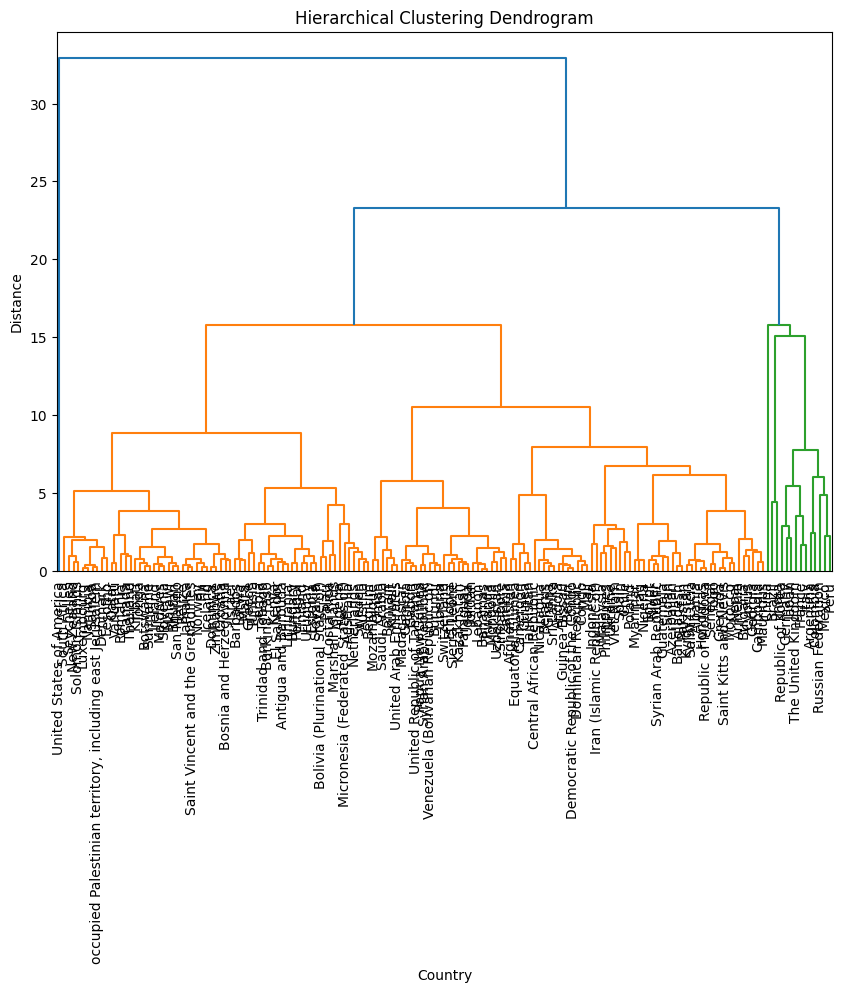

In [18]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler

# Selecting a subset of features for clustering
# Here, I choose accumulated cases and deaths for different years and some socio-economic indicators
selected_columns = ['Accumulated Cases 2020', 'Accumulated Deaths 2020',
                       'Accumulated Cases 2021', 'Accumulated Deaths 2021',
                       'Accumulated Cases 2022', 'Accumulated Deaths 2022',
                       'GDP', 'Out of pocket health expenditure',
                       'Tax revenue (%)', 'Total tax rate']

file_path = './merged_covid_data_final.csv'
data = pd.read_csv(file_path)
data['GDP'] = data['GDP'].replace('[\$,]', '', regex=True).astype(float)
for col in ['Out of pocket health expenditure', 'Tax revenue (%)', 'Total tax rate']:
    data[col] = data[col].str.rstrip('%').astype('float')

scaler = MinMaxScaler()
data['GDP'] = scaler.fit_transform(data[['GDP']])

# Filter out countries with missing data in the selected columns
filtered_data = data.dropna(subset=selected_columns)

# Extracting the selected features
clustering_data = filtered_data[selected_columns]

# Normalizing the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(clustering_data)

# Applying Hierarchical Clustering
linked = linkage(normalized_data, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=filtered_data['Country'].values, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Country')
plt.ylabel('Distance')
plt.show()


C:\Users\ander\AppData\Local\Temp\ipykernel_28408\794788613.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = cluster_labels
C:\Users\ander\AppData\Local\Temp\ipykernel_28408\794788613.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Total Accumulated Cases'] = filtered_data['Accumulated Cases 2020'] + filtered_data['Accumulated Cases 2021'] + filtered_data['Accumulated Cases 2022']
C:\Users\ander\AppData\Local\Temp\ipykernel_28408\794788613.py:12: SettingWith

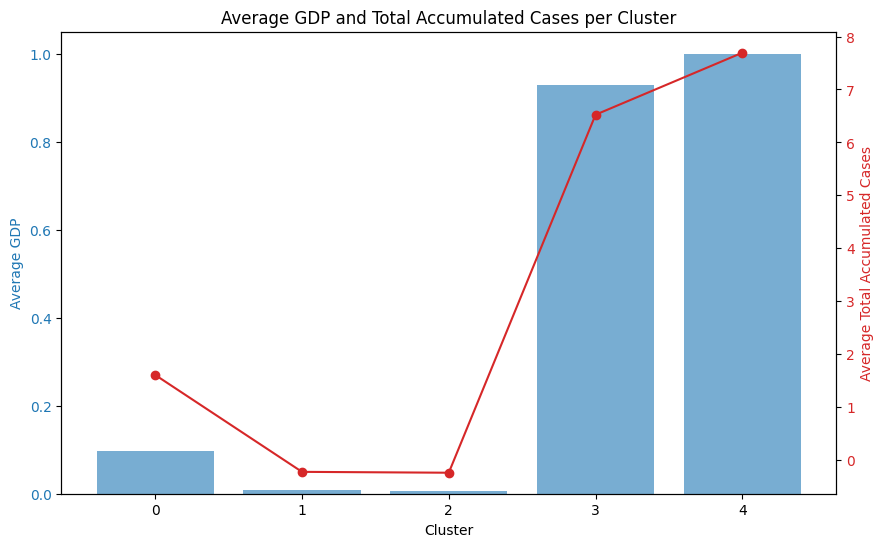

In [24]:
n_clusters = 5

# Perform Agglomerative Clustering
clustering_model = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = clustering_model.fit_predict(normalized_data)

# Adding cluster labels to the filtered data
filtered_data['Cluster'] = cluster_labels

# Calculating the mean GDP and mean accumulated cases for each cluster
filtered_data['Total Accumulated Cases'] = filtered_data['Accumulated Cases 2020'] + filtered_data['Accumulated Cases 2021'] + filtered_data['Accumulated Cases 2022']
filtered_data['Total Accumulated Cases'] = scaler.fit_transform(filtered_data[['Total Accumulated Cases']])
clustered_gdp_cases = filtered_data.groupby('Cluster')[['GDP', 'Total Accumulated Cases']].mean()


# Plotting GDP and Cases for each cluster
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Cluster')
ax1.set_ylabel('Average GDP', color='tab:blue')
ax1.bar(clustered_gdp_cases.index, clustered_gdp_cases['GDP'], color='tab:blue', alpha=0.6)
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Average Total Accumulated Cases', color='tab:red')  # we already handled the x-label with ax1
ax2.plot(clustered_gdp_cases.index, clustered_gdp_cases['Total Accumulated Cases'], color='tab:red', marker='o')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Average GDP and Total Accumulated Cases per Cluster')
plt.show()